Признаки в датасете следующие:

- **PassengerId** - id пассажира
- **Pclass** - класс обслуживания билета (1 = первый, 2 = второй, 3 = третий)
- **Name** - имя пассажира
- **Sex** - пол пассажира
- **Age** - возраст пассажира
- **SibSp** - семейные отношения sibling/spouse (sibling = брат, сестра, сводный брат, сводная сестра, spouse = муж, жена)
- **Parch** - семейные отношения parent/child (parent = родитель
child = ребенок). Некоторые дети путешествовали только с няней, поэтому для них parch=0.
- **Ticket** - номер билета
- **Fare** - стоимость билета
- **Cabin** - номер кабины
- **Embarked** - Порт посадки. (C = Шербур, Q = Квинстаун, S = Саутгемптон)

Целевая переменная:
- <font color='Red'>**Survived**</font> - Выжил человек или нет. 0 = Нет, 1 = Да.

In [3]:
!gdown 1KWlcYkMkDIZdATT2TTcnIfudNP-PSUci

Downloading...
From: https://drive.google.com/uc?id=1KWlcYkMkDIZdATT2TTcnIfudNP-PSUci
To: /home/matalhim/github/repositories/ml/titanic/titanic.csv
100%|██████████████████████████████████████| 61.2k/61.2k [00:00<00:00, 1.52MB/s]


In [ ]:
!mkdir dataset
!mv titanic.csv dataset


In [6]:
!ls dataset

titanic.csv


In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
)
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv('dataset/titanic.csv', index_col='PassengerId')
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.loc[(df.Survived == 0), 'Survived'] = -1
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,-1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,-1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [23]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,-0.232323,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.973185,0.836071,14.526497,1.102743,0.806057,49.693429
min,-1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,-1.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,-1.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
none_count = df.isna().sum(axis=0)
none_count

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<BarContainer object of 11 artists>

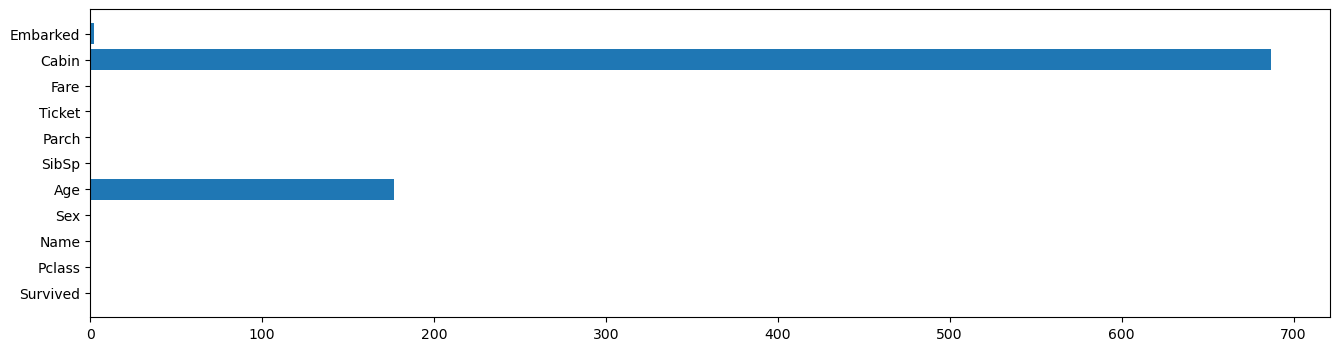

In [46]:
plt.figure(figsize=(16,4))
plt.barh(none_count.index, none_count.values)

<Axes: xlabel='PassengerId'>

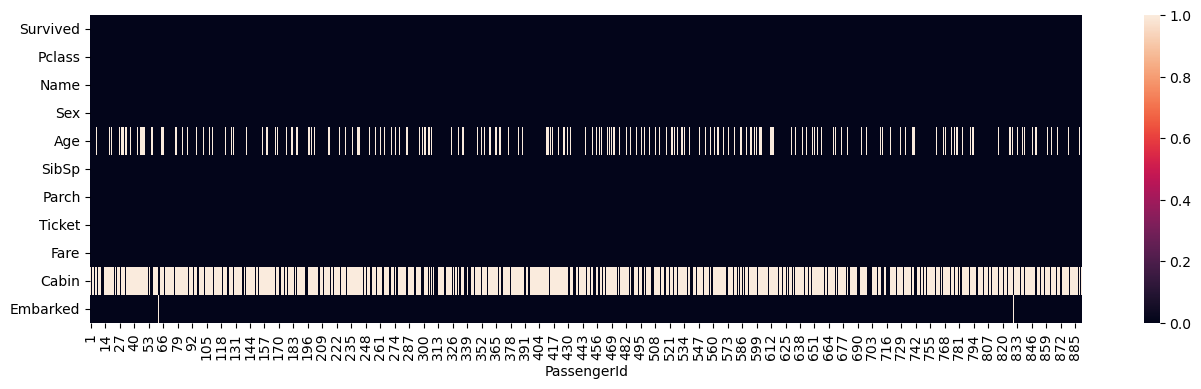

In [45]:
plt.figure(figsize=(16,4))
sns.heatmap(df.isna().transpose())

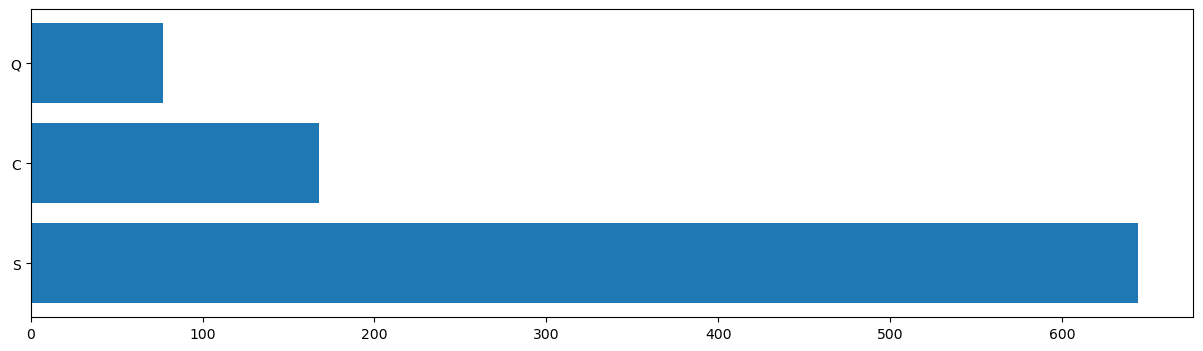

mode = S


In [53]:
data = df['Embarked'].value_counts()
plt.figure(figsize=(15,4))
plt.barh(data.index, data.values)
plt.show()
print(f'mode = {df['Embarked'].mode()[0]}')

In [58]:
mean_age = np.mean(df['Age'].dropna().values)
median_age = np.median(df['Age'].dropna().values)
print(f'age, mean: {mean_age:.0f}, median: {median_age:.0f}')

age, mean: 30, median: 28


In [60]:
df.dropna(inplace=True)

In [68]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                   'Dr', 'Major', 'Sir'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_6218/3943156502.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [69]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Master,0,7
Miss,46,0
Mr,0,81
Mrs,39,0
Rare,3,7


In [70]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,1.000000
1,Miss,0.869565
2,Mr,-0.259259
3,Mrs,0.846154
4,Rare,0.400000


In [73]:
# df.drop(columns=['Cabin', 'Name','Ticket'], inplace=True)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
2,1,1,female,38.0,1,0,71.2833,C,Mrs
4,1,1,female,35.0,1,0,53.1000,S,Mrs
7,-1,1,male,54.0,0,0,51.8625,S,Mr
11,1,3,female,4.0,1,1,16.7000,S,Miss
12,1,1,female,58.0,0,0,26.5500,S,Miss


In [87]:
df['Survived'].value_counts()

Survived
 1    123
-1     60
Name: count, dtype: int64

In [91]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [93]:
categorical_columns = ['Pclass', 'Sex', 'Pclass', 'Parch', 'Embarked', 'Title']
categorical_features = df[categorical_columns]
categorical_features                  

,Pclass,Sex,Pclass,Parch,Embarked,Title
PassengerId,,,,,,
2,1,female,1,0,C,Mrs
4,1,female,1,0,S,Mrs
7,1,male,1,0,S,Mr
11,3,female,3,1,S,Miss
12,1,female,1,0,S,Miss
...,...,...,...,...,...,...
872,1,female,1,1,S,Mrs
873,1,male,1,0,S,Mr
880,1,female,1,1,C,Mrs


In [94]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['Sex', 'Embarked', 'Title']

one hot encoding

In [96]:
df.Title.unique()

array(['Mrs', 'Mr', 'Miss', 'Master', 'Rare'], dtype=object)

In [98]:
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df[unprocessed_cat_features]).toarray()
one_hot_df = pd.DataFrame(
    one_hot_encoded, 
    columns=encoder.get_feature_names_out(unprocessed_cat_features), 
    index=df.index
)

In [100]:
one_hot_df.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
PassengerId,,,,,,,,,,
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
12,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [102]:
df_one_hot = pd.concat([df, one_hot_df], axis=1)
df_one_hot.drop(columns=unprocessed_cat_features, inplace=True)
df_one_hot.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
PassengerId,,,,,,,,,,,,,,,,
2,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,-1,1,54.0,0,0,51.8625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11,1,3,4.0,1,1,16.7000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
12,1,1,58.0,0,0,26.5500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


label encoding

In [104]:
label_encoder = LabelEncoder()
for column in unprocessed_cat_features:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
2,1,1,0,38.0,1,0,71.2833,0,3
4,1,1,0,35.0,1,0,53.1000,2,3
7,-1,1,1,54.0,0,0,51.8625,2,2
11,1,3,0,4.0,1,1,16.7000,2,1
12,1,1,0,58.0,0,0,26.5500,2,1


In [106]:
numerical_columns = ['Age', 'Fare']
num_features = df[numerical_columns]
num_features

,Age,Fare
PassengerId,,
2,38.0,71.2833
4,35.0,53.1000
7,54.0,51.8625
11,4.0,16.7000
12,58.0,26.5500
...,...,...
872,47.0,52.5542
873,33.0,5.0000
880,56.0,83.1583


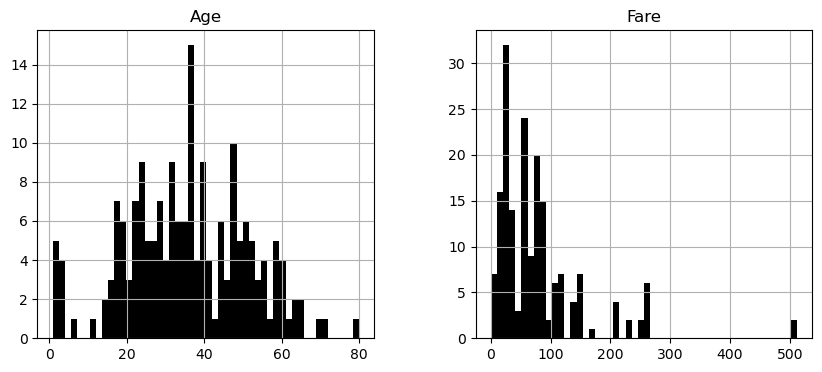

In [110]:
num_features.hist(figsize=(10,4), bins=50, xlabelsize=10, ylabelsize=10, color='black');

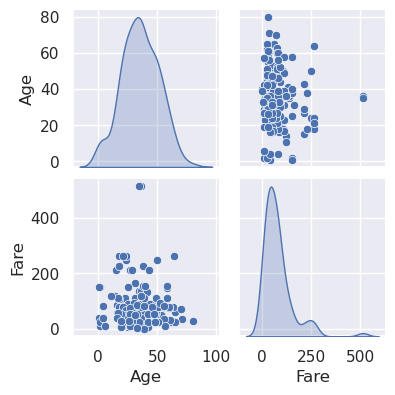

In [114]:
sns.set_theme()
sns.pairplot(df[numerical_columns], height=2, kind='scatter', diag_kind='kde')
plt.show()

кореояционная матрица

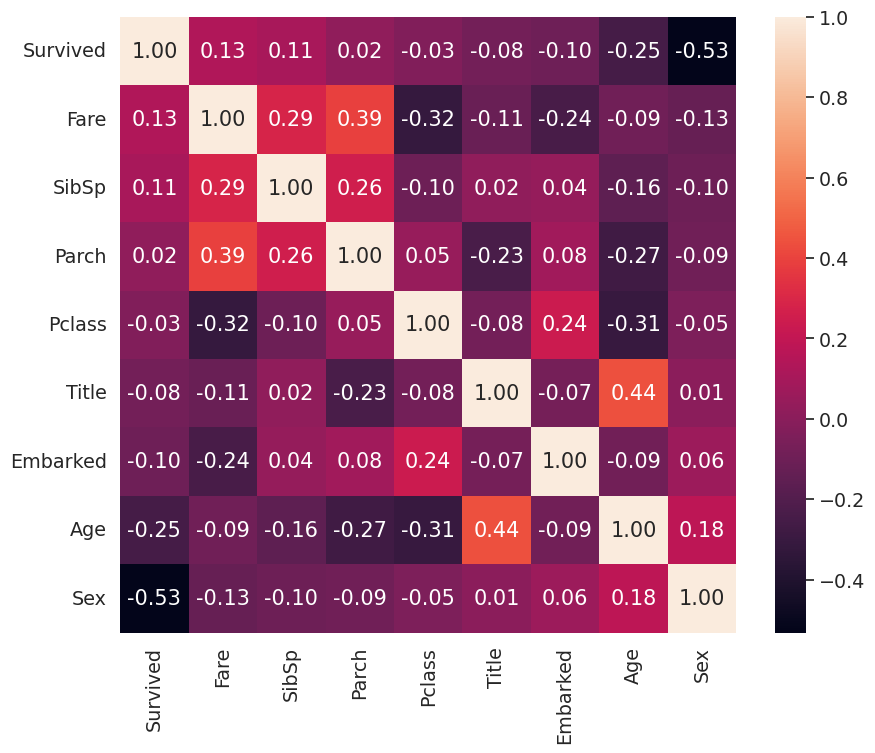

In [125]:
plt.figure(figsize=(10,8))
cormat = df.corr()
k = 10
cols = cormat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df[cols].values.T)
sns.set_theme(font_scale=1.25)
hm = sns.heatmap(
    cm, 
    cbar=True, 
    annot=True, 
    square=True, 
    fmt='.2f',
    yticklabels=cols.values,
    xticklabels=cols.values,
)
plt.show()

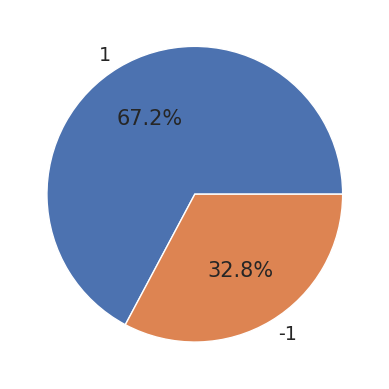

In [127]:
data = df['Survived'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.1f%%')
plt.show()

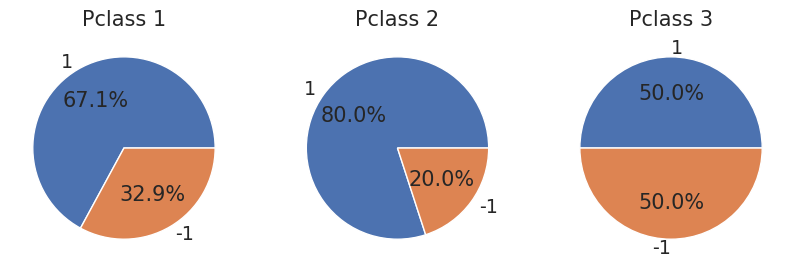

In [135]:
data1 = df.loc[(df.Pclass == 1)]['Survived'].value_counts()
data2 = df.loc[(df.Pclass == 2)]['Survived'].value_counts()
data3 = df.loc[(df.Pclass == 3)]['Survived'].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')

ax1.set_title('Pclass 1')
ax2.set_title('Pclass 2')
ax3.set_title('Pclass 3')


plt.show()

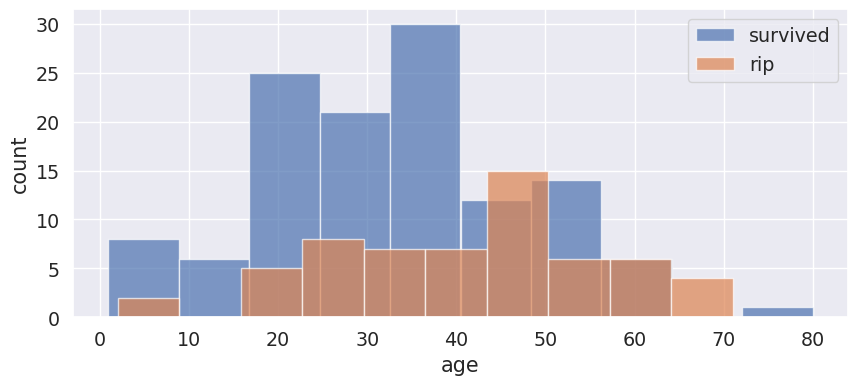

In [138]:
plt.figure(figsize=(10,4))
plt.hist(df.loc[(df.Survived == 1)]['Age'], alpha=0.7, label='survived')
plt.hist(df.loc[(df.Survived == -1)]['Age'], alpha=0.7, label='rip')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

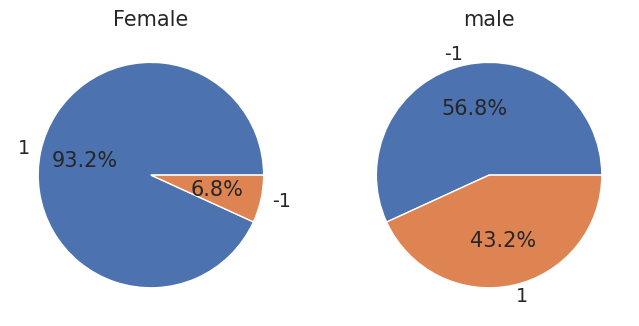

In [141]:
data1 = df.loc[(df.Sex == 0)]['Survived'].value_counts()
data2 = df.loc[(df.Sex == 1)]['Survived'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title('Female')
ax2.set_title('male')

plt.show()

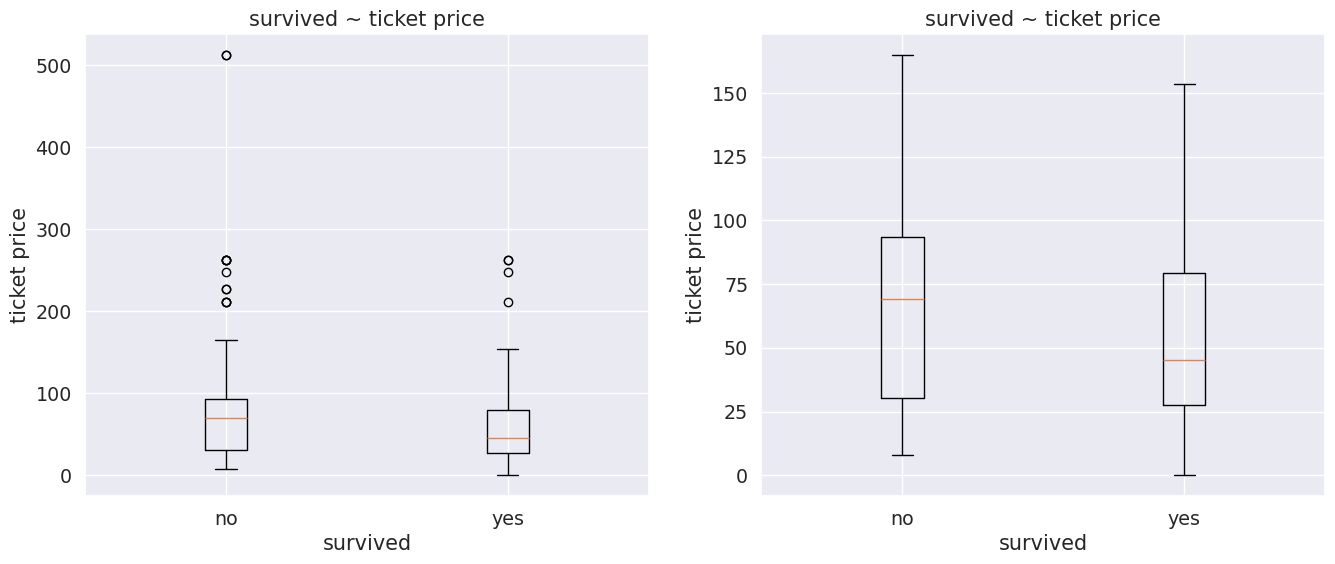

In [156]:
data1 = df.loc[(df.Survived == 1)]['Fare']
data2 = df.loc[(df.Survived == -1)]['Fare']

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.boxplot([data1, data2])
ax2.boxplot([data1, data2], showfliers=False)


ax1.set_title('survived ~ ticket price')
ax1.set_xlabel('survived')
ax1.set_ylabel('ticket price')
ax1.set_xticks([1, 2], ['no', 'yes'])

ax2.set_title('survived ~ ticket price')
ax2.set_xlabel('survived')
ax2.set_ylabel('ticket price')
ax2.set_xticks([1, 2], ['no', 'yes'])

plt.show()

## train/test

In [157]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
2,1,1,0,38.0,1,0,71.2833,0,3
4,1,1,0,35.0,1,0,53.1000,2,3
7,-1,1,1,54.0,0,0,51.8625,2,2


In [158]:
X = df.drop(columns=['Survived']).values
y = df['Survived'].values

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

Масштабирование данных

`StandardScaler()` во время `.fit()` для каждого признака $x_i$ считает среднее $\mu_i$ и стандартное отклонение $\sigma_i$ на обучающем датасете. Во время `.transform()` к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - \mu_i}{\sigma_i}$$


`MinMaxScaler()` во время `.fit()` для каждого признака $x_i$ считает минимум $x_{i, \text{min}}$ и максимум $x_{i, \text{max}}$ на обучающем датасете. Во время `.transform()` к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - x_{i, \text{min}}}{x_{i, \text{max}} - x_{i, \text{min}}}$$

In [167]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
